In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from ssm_compare import fit_slds_and_return_errors

In [2]:
#N_array = np.array([10,14,18,20,30,50,80,100,200,400,1000,2000,4000])
N_array = np.array([10,14,18,20,30,50,80,100,200,400,1000])
#N_array = np.array([10,100,1000])
#N_array = np.array([10,14,18,20,30,50,80,100,200])
Kmax = 2
num_iters = 4000
num_restarts = 5

r = 4
model = "SLDS(4)"
single_subspace = True
# r = 6
# model = "SLDS(6)""


table_file = "../data/comparison_output_200_rank4_iter_4000.csv"
#output_file = "../data/comparison_final_rank4.csv"
#output_file = "../data/comparison_output_2000_slds.csv"
# output_file = "../data/comparison_output_arhmm.csv"



In [3]:
# error_table = pd.read_csv(table_file)

error_table = pd.DataFrame(columns = ['N', 'window', 'model', 'err_inf', 'err_2', 'err_fro', 'model_MSE', \
                  'true_MSE'])

print(error_table.head())
print(error_table.columns)
print(error_table['model'].unique())

Empty DataFrame
Columns: [N, window, model, err_inf, err_2, err_fro, model_MSE, true_MSE]
Index: []
Index(['N', 'window', 'model', 'err_inf', 'err_2', 'err_fro', 'model_MSE',
       'true_MSE'],
      dtype='object')
[]


## Fit SLDS with rank r = 4 & r = 6

In [ ]:
for N in N_array:
    print("-----------------------------\nN=%d, STEPS: %d " % (N, num_iters))
    for rep in range(3):
        # load data
        #data = scipy.io.loadmat("../data/test_data_N_%d_M_2001_sigma_0.500000_rep_%d.mat" % (N, rep + 1))
        data = scipy.io.loadmat("../data/test_data_N_%d_M_201_sigma_0.500000_rep_%d.mat" % (N, rep + 1))
        X = data['X']
        A1 = data['A1']
        A2 = data['A2']

        # fit model
        err_inf, err_2, err_fro, err_mse, _ = \
            fit_slds_and_return_errors(X.T, A1, A2, Kmax=Kmax, r=r, 
                                       num_iters=num_iters, num_restarts=num_restarts,
                                      single_subspace=single_subspace)

        # print some output
        print("N = %d : err_inf = %f, err_2 = %f, err_fro = %f, err_mse = %f" % \
               (N, err_inf, err_2, err_fro, err_mse))
        new_row = dict(zip(error_table.columns, 
                           [N, np.nan, model, err_inf, err_2, err_fro, err_mse, np.nan]))
        error_table = error_table.append(new_row, ignore_index=True)

# write output
error_table.to_csv(output_file, header=True, index=False)

-----------------------------
N=10, STEPS: 4000 
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 10 : err_inf = 0.453766, err_2 = 1.289326, err_fro = 1.503044, err_mse = 0.165327
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 10 : err_inf = 0.459400, err_2 = 1.272211, err_fro = 1.423901, err_mse = 0.163194
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 10 : err_inf = 0.445868, err_2 = 1.199014, err_fro = 1.293361, err_mse = 0.172889
-----------------------------
N=14, STEPS: 4000 
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 14 : err_inf = 0.341490, err_2 = 1.290099, err_fro = 1.420393, err_mse = 0.305956
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 14 : err_inf = 0.286999, err_2 = 1.090638, err_fro = 1.185375, err_mse = 0.289168
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 14 : err_inf = 0.483229, err_2 = 1.701255, err_fro = 1.816227, err_mse = 0.348563
-----------------------------
N=18, STEPS: 4000 
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 18 : err_inf = 0.237653, err_2 = 0.900927, err_fro = 1.056349, err_mse = 0.491064
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 18 : err_inf = 0.291787, err_2 = 1.089662, err_fro = 1.223604, err_mse = 0.462122
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 18 : err_inf = 0.296567, err_2 = 1.029533, err_fro = 1.171066, err_mse = 0.486722
-----------------------------
N=20, STEPS: 4000 
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 20 : err_inf = 0.159834, err_2 = 0.812607, err_fro = 0.912034, err_mse = 0.569306
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 20 : err_inf = 0.357223, err_2 = 1.290427, err_fro = 1.379117, err_mse = 0.593097
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 20 : err_inf = 0.290641, err_2 = 1.309147, err_fro = 1.515976, err_mse = 0.600563
-----------------------------
N=30, STEPS: 4000 
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  4  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  5  /  5


Initializing with an ARHMM using 25 steps of EM.



predicted states:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
N = 30 : err_inf = 0.237489, err_2 = 1.540649, err_fro = 1.612166, err_mse = 1.277022
restart  1  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  2  /  5


Initializing with an ARHMM using 25 steps of EM.



restart  3  /  5


Initializing with an ARHMM using 25 steps of EM.


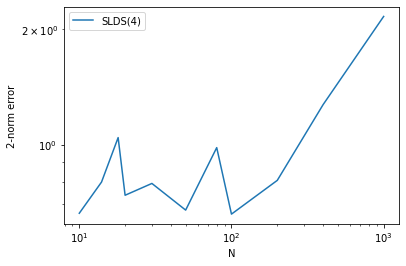

In [19]:
data = error_table
#plt.loglog(data['N'], data['err_2'])
fig, ax = plt.subplots()

for key, grp in data.groupby(['model']):
    grp = grp.groupby(['N']).mean()
#     if key == 1:
#         keystr = 'indep(N)'
#     elif key == 2:
#         keystr = 'indep(4)'
#     elif key == 3:
#         keystr = 'TVART(4)'
#     elif key == 4:
#         keystr = 'SLDS(4)'
#     elif key == 5:
#         keystr = 'SLDS(6)'
#     elif key == 6:
#         keystr = 'SLDS(2)'
    keystr = key
    ax = grp.plot(ax=ax, kind='line', y='err_2', label=keystr, logx=True, logy=True)
    plt.ylabel('2-norm error')

plt.legend(loc='best')
#plt.ylim([1e-2, 1e-1])
plt.show()

#data.plot.line(x='N', y='err_inf', logx=True, logy=True)

In [ ]:
error_table.tail()